# (Multi Linear Regression)

## Que: Prepare a prediction model for predicting Price.

## Importing Libraries

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the Data

In [ ]:
toyota= pd.read_csv('/content/ToyotaCorolla.csv',encoding='latin1')
toyota.head(6)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,White,0,2000,3,4,5,210,1170,0,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [ ]:
toyota_data = toyota.loc[:,["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


## Data Understanding

In [ ]:
toyota_data.shape

(1436, 9)

In [ ]:
toyota_data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [ ]:
toyota_data[toyota_data.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
toyota_data=toyota_data.drop_duplicates().reset_index(drop=True)
toyota_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
toyota_data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


## 3.[i]) Check For Assumption (Linearity)

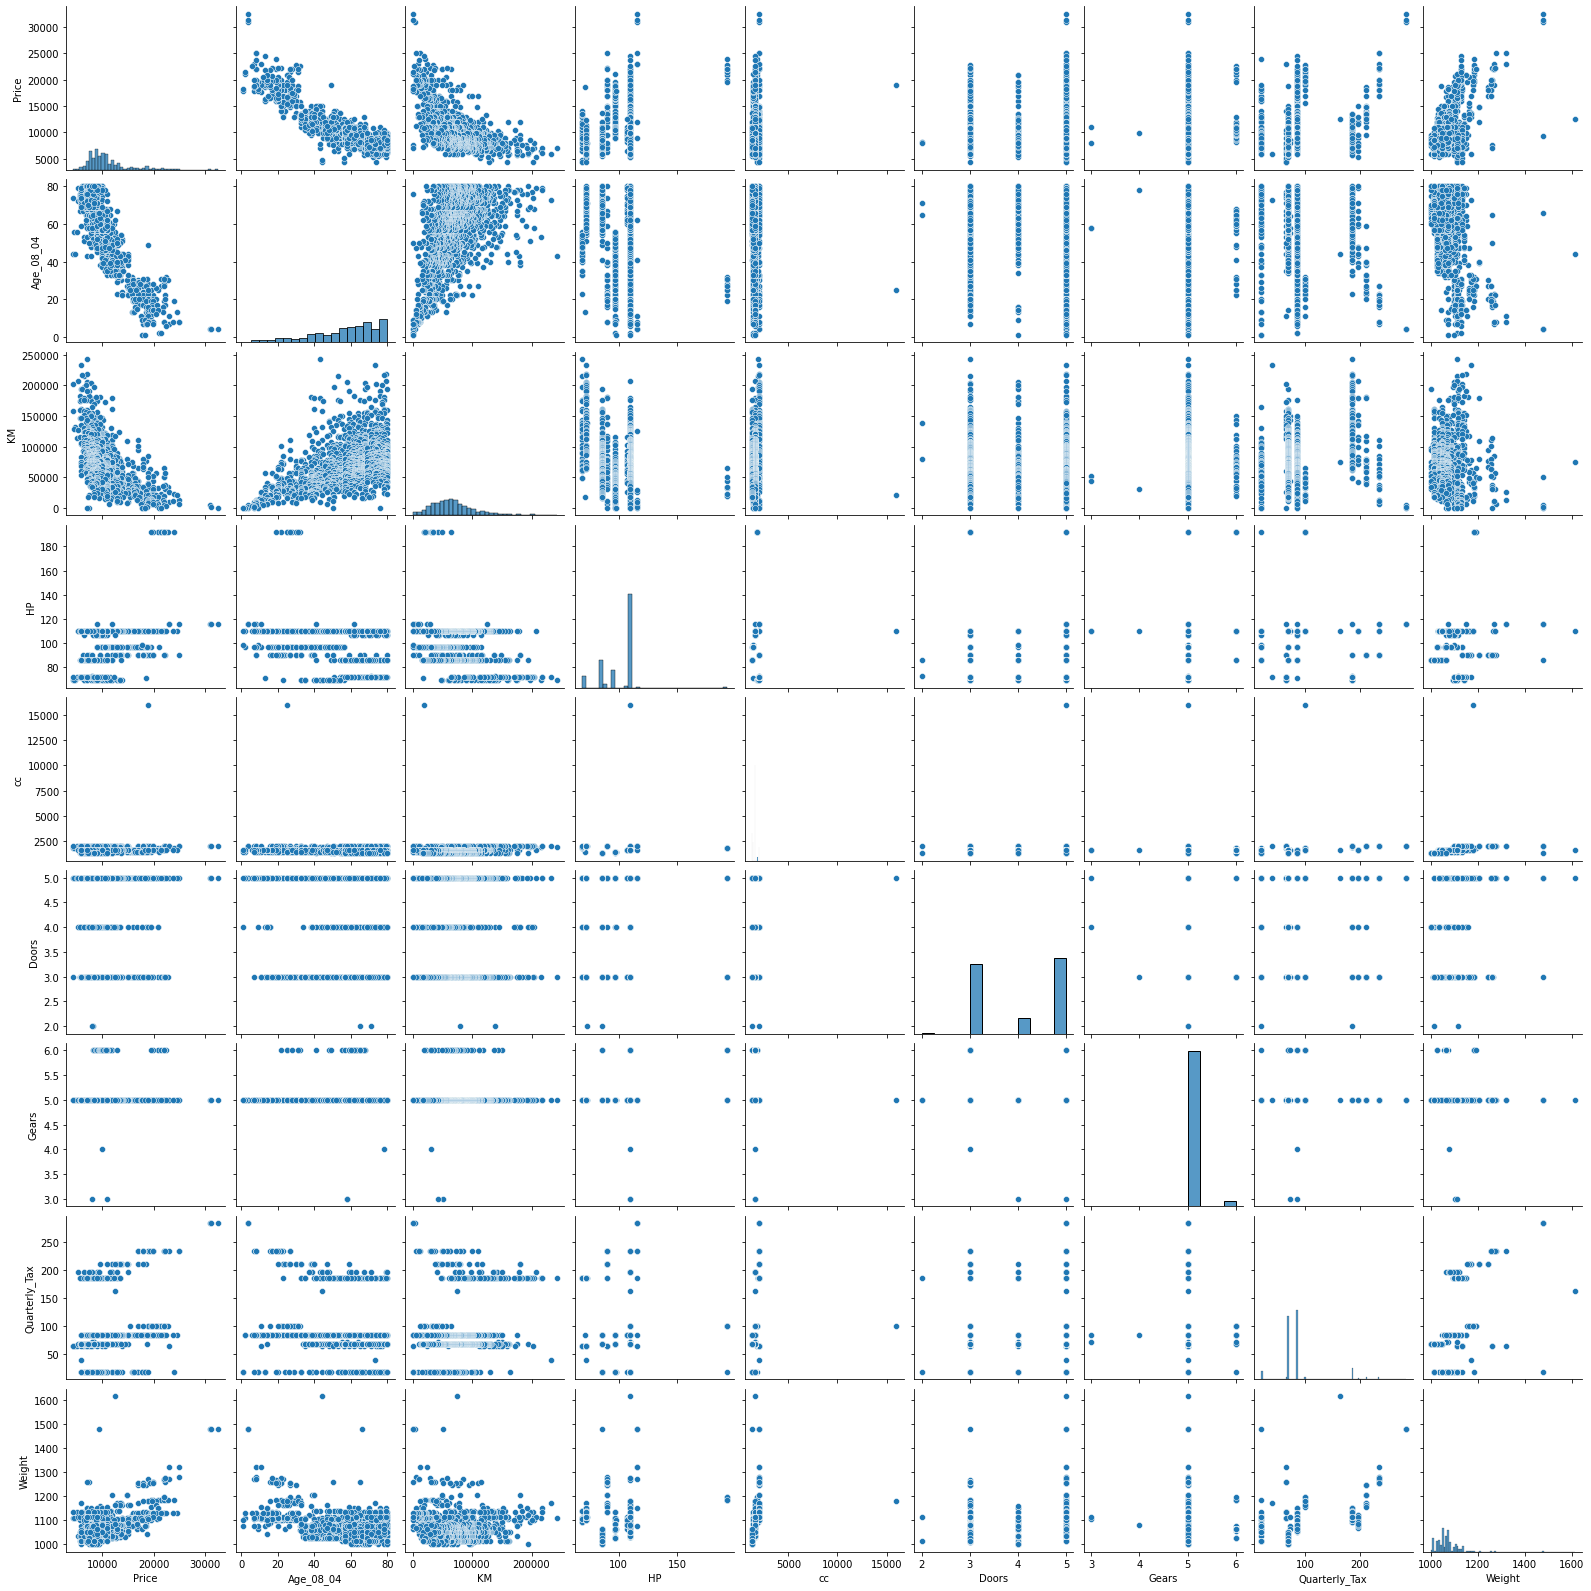

In [ ]:
sns.pairplot(toyota_data)

### Only Age_08_04 is Proportional to the price data remaining variables are not Proportional to the price data.



## 3.[iii]) Checking Multicollinearity

In [ ]:
corr =toyota_data.corr()

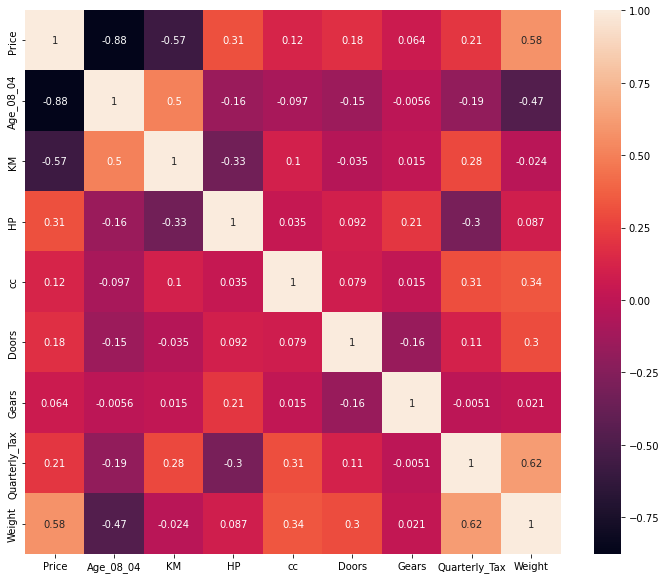

In [ ]:
plt.figure(figsize=(12,10))  # it shows that there is  no Multicollinearity in the variables between eachother (values are near to zero)
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
rsq_Age_08_04= smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data).fit().rsquared
vif_Age_08_04 = 1/(1-rsq_Age_08_04)

rsq_KM= smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP= smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_cc= smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_Doors= smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyota_data).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears= smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=toyota_data).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_Quarterly_Tax= smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=toyota_data).fit().rsquared
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax)

rsq_Weight= smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=toyota_data).fit().rsquared
vif_Weight= 1/(1-rsq_Weight)

dv={'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],
    'Vif':[vif_Age_08_04,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif=pd.DataFrame(dv)
Vif

,Variables,Vif
0,Age_08_04,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


### As all the values are less than 5 so there is no Multicollinearity occurs between the features. we can consider all the features for regression modeling

## 3.[iv]Check Autoregression
## No AutoRegrrssion (No Time influence)

## 3.[v]Check Zero residual Mean

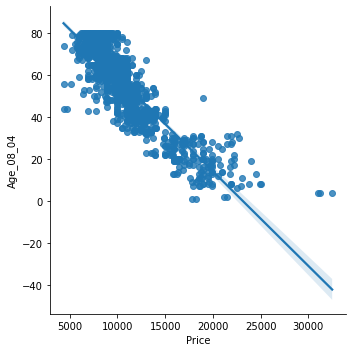

In [ ]:
sns.lmplot(x='Price',y='Age_08_04',data=toyota_data)
plt.show()

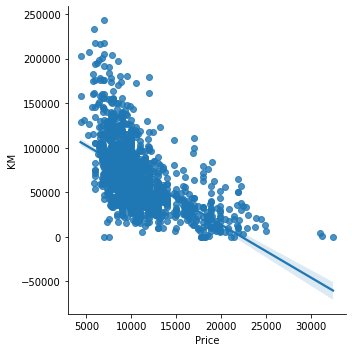

In [ ]:
sns.lmplot(x='Price',y='KM',data=toyota_data)   
plt.show()

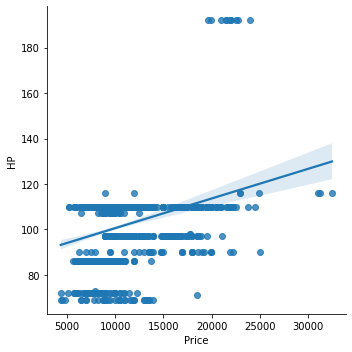

In [ ]:
sns.lmplot(x='Price',y='HP',data=toyota_data)
plt.show()

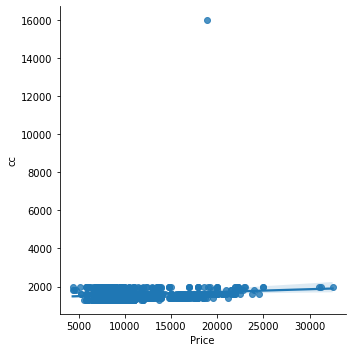

In [ ]:
sns.lmplot(x='Price',y='cc',data=toyota_data)
plt.show()

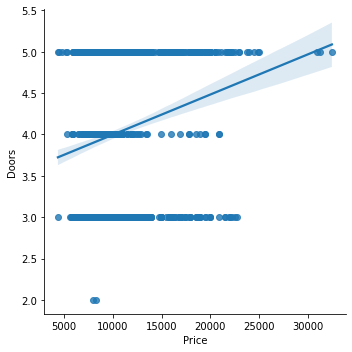

In [ ]:
sns.lmplot(x='Price',y='Doors',data=toyota_data)
plt.show()

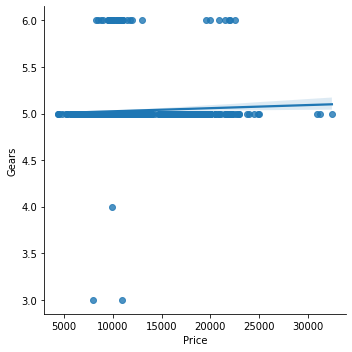

In [ ]:
sns.lmplot(x='Price',y='Gears',data=toyota_data)
plt.show()

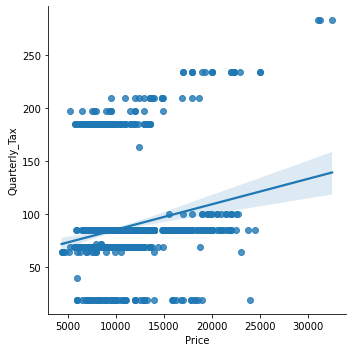

In [ ]:
sns.lmplot(x='Price',y='Quarterly_Tax',data=toyota_data)
plt.show()

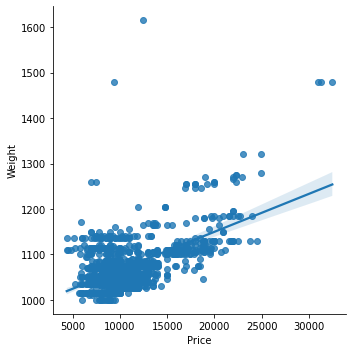

In [ ]:
sns.lmplot(x='Price',y='Weight',data=toyota_data)
plt.show()

## Data Preparation

In [ ]:
toyota_data.head(6)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170


In [ ]:
 X = toyota_data.drop(['Price'], axis=1)
 X

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1430,69,20544,86,1300,3,5,69,1025
1431,72,19000,86,1300,3,5,69,1015
1432,71,17016,86,1300,3,5,69,1015
1433,70,16916,86,1300,3,5,69,1015


In [ ]:
y = toyota_data.iloc[:,:1]
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1430,7500
1431,10845
1432,8500
1433,7250


## Model Builing and Model Training

In [ ]:
#from sklearn.linear_model import LinearRegression

In [ ]:
# Training with Sklearn
mult_linear_model = LinearRegression()

# training with Stats Models
mult_linear_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data).fit()

In [ ]:
#mult_linear_model.fit(X,y)

In [ ]:
y_pred = mult_linear_model.predict(X)
y_pred = pd.DataFrame(y_pred)
y_pred 

,0
0,16791.958871
1,16253.800414
2,16779.635210
3,16405.789389
4,16200.217277
...,...
1430,8794.255037
1431,8292.577342
1432,8455.434402
1433,8579.222041


## Model Evaluation

In [ ]:
mult_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:59:20   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age_08_04      -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### CC & Doors are two feature having P-value more than the 0.05 so we can consider that they don't have significant impact on the Prediction.

In [ ]:
m_cc =smf.ols('Price~cc',data=toyota_data).fit()

In [ ]:
m_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           2.29e-06
Time:                        10:59:20   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### P value is lesser than alpha we can not ignore the CC Feature

In [ ]:
m_Doors = smf.ols('Price~Doors',data=toyota_data).fit()

In [ ]:
m_Doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           2.40e-12
Time:                        10:59:20   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### P value is lesser than alpha we can not ignore the Doors Feature


In [ ]:
m_cc_Doors = smf.ols('Price~Doors+cc',data=toyota_data).fit()

In [ ]:
m_cc_Doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           2.55e-15
Time:                        10:59:20   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
cc             0.9398      0.220      4.268      0.000       0.508       1.372
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### For the Combine case for features cc and Doors the P value is lesser than alpha we can not ignore the Feature Doors in Model


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y, y_pred=y_pred)

1789147.6788508198

Checking homoscedasticity
(standardized fitted values vs standardized residual values)

In [ ]:
def standard_values(vals) :
    return (vals-vals.mean())/vals.std()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


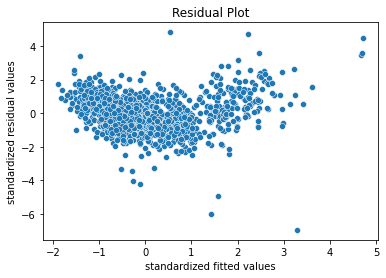

In [ ]:
sns.scatterplot(standard_values(mult_linear_model.fittedvalues),standard_values(mult_linear_model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

## Residuals Vs Regressors Plot

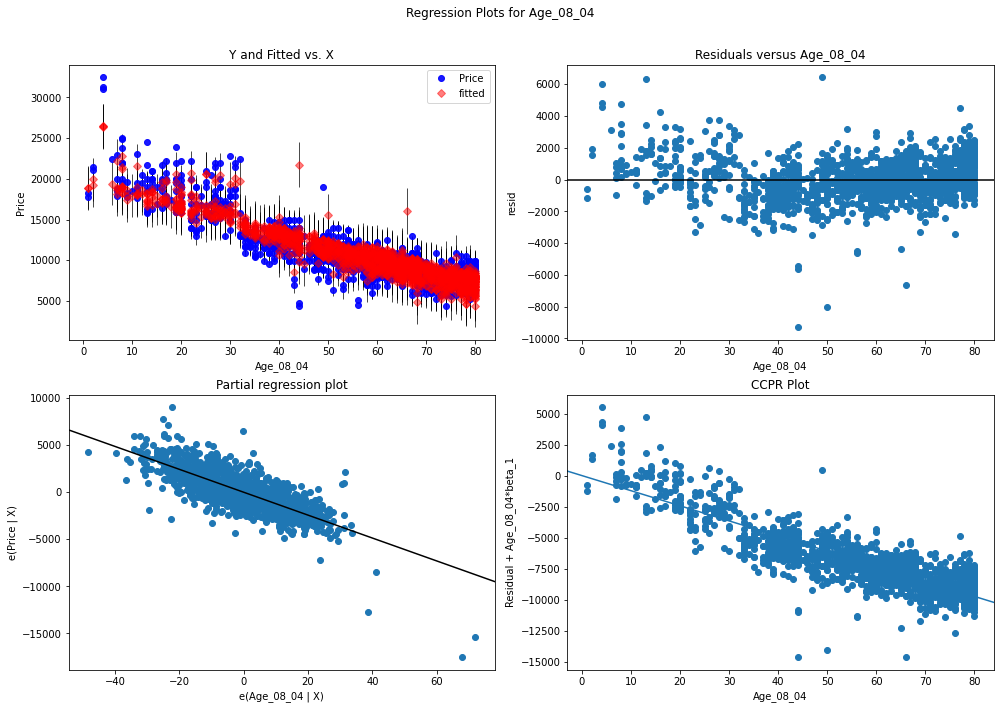

In [ ]:
fig=plt.figure(figsize=(14,10))
sm.graphics.plot_regress_exog(mult_linear_model,'Age_08_04',fig=fig)
plt.show()

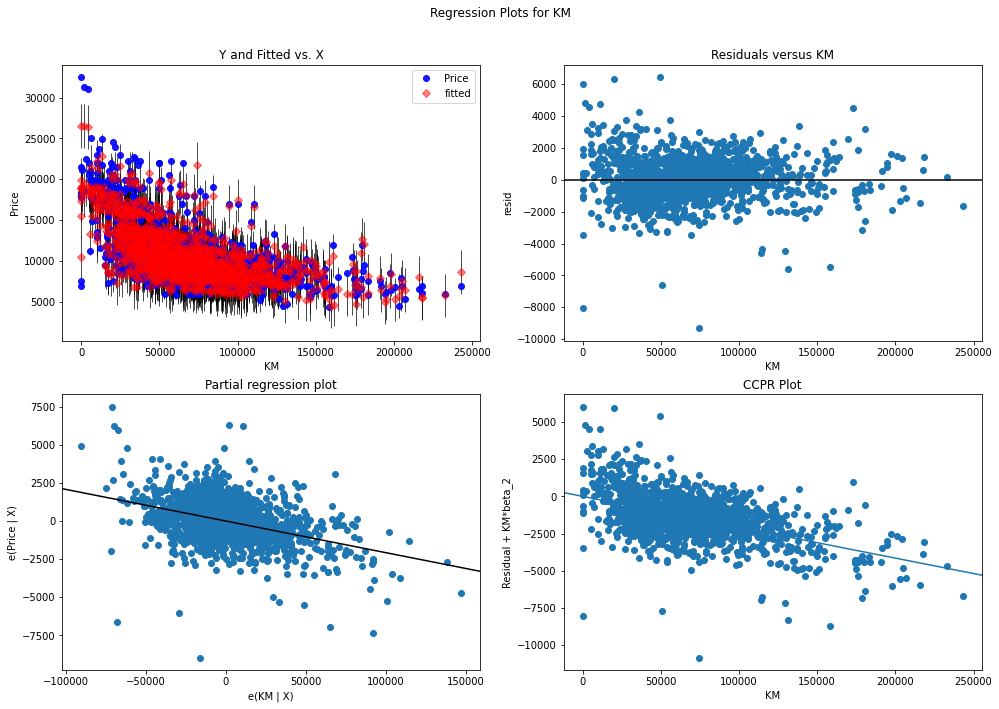

In [ ]:
fig=plt.figure(figsize=(14,10))
sm.graphics.plot_regress_exog(mult_linear_model,'KM',fig=fig)
plt.show()

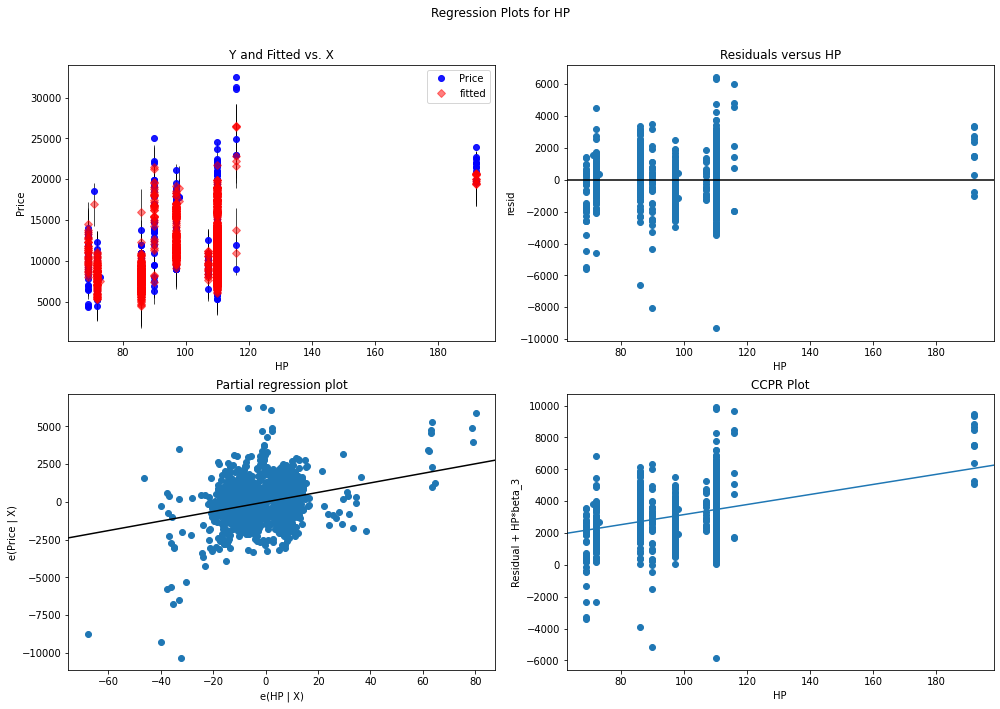

In [ ]:
fig=plt.figure(figsize=(14,10))
sm.graphics.plot_regress_exog(mult_linear_model,'HP',fig=fig)
plt.show()

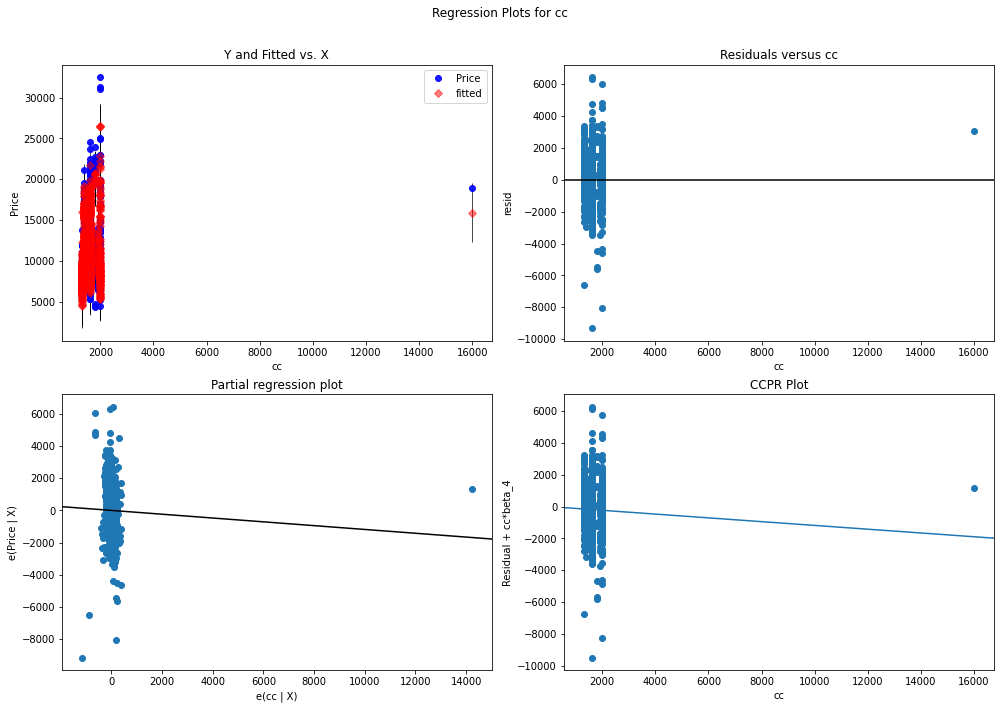

In [ ]:
fig=plt.figure(figsize=(14,10))
sm.graphics.plot_regress_exog(mult_linear_model,'cc',fig=fig)
plt.show()

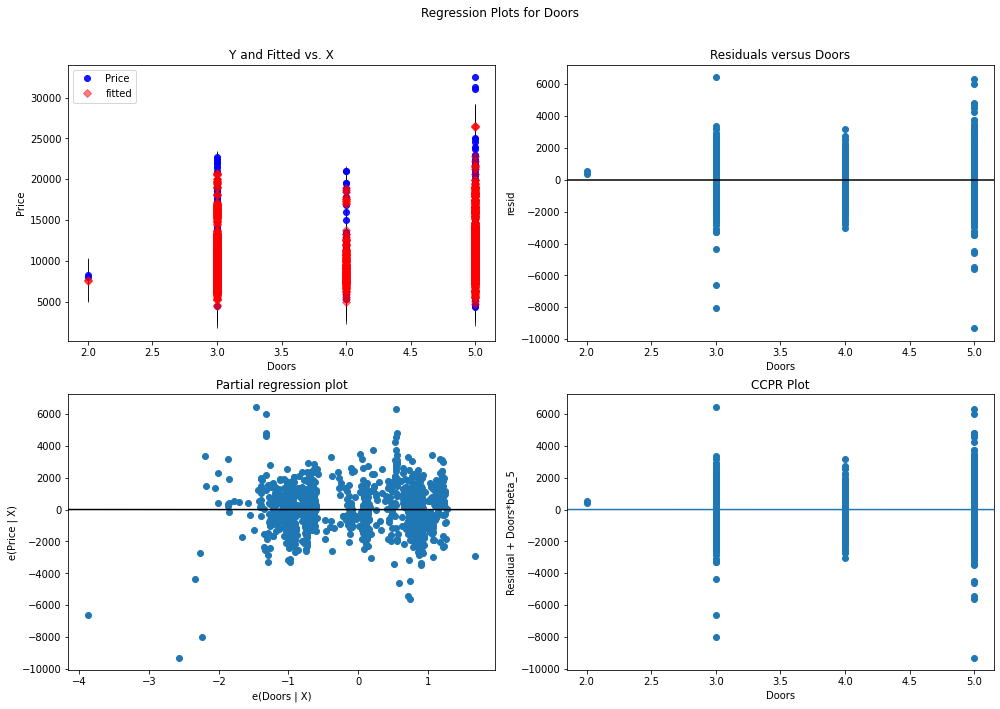

In [ ]:
fig=plt.figure(figsize=(14,10))
sm.graphics.plot_regress_exog(mult_linear_model,'Doors',fig=fig)
plt.show()

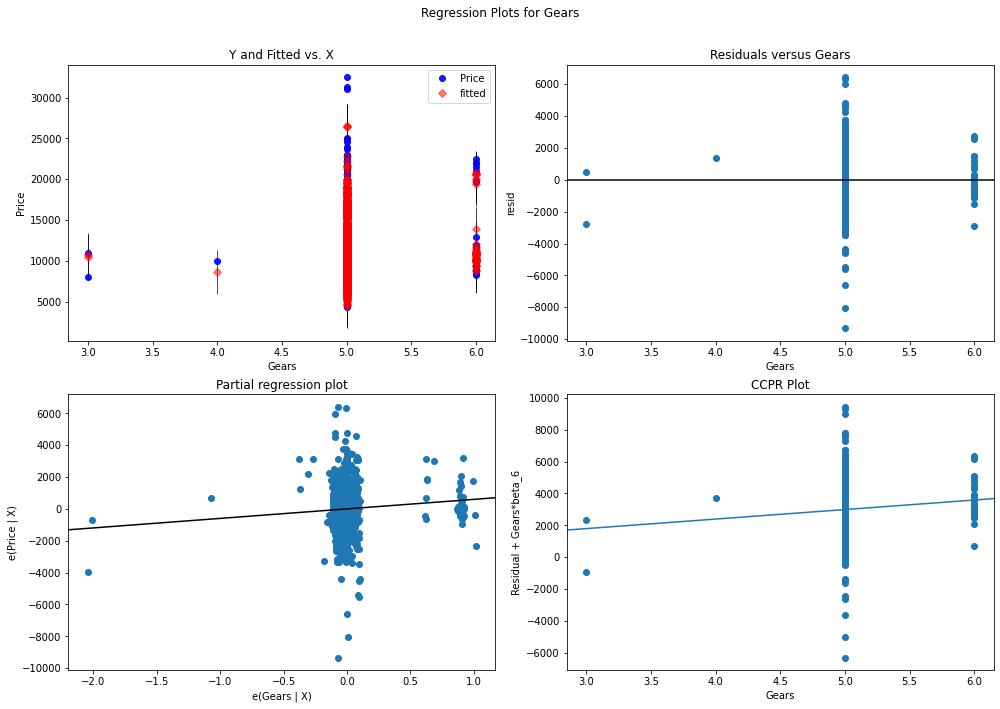

In [ ]:
fig=plt.figure(figsize=(14,10))
sm.graphics.plot_regress_exog(mult_linear_model,'Gears',fig=fig)
plt.show()

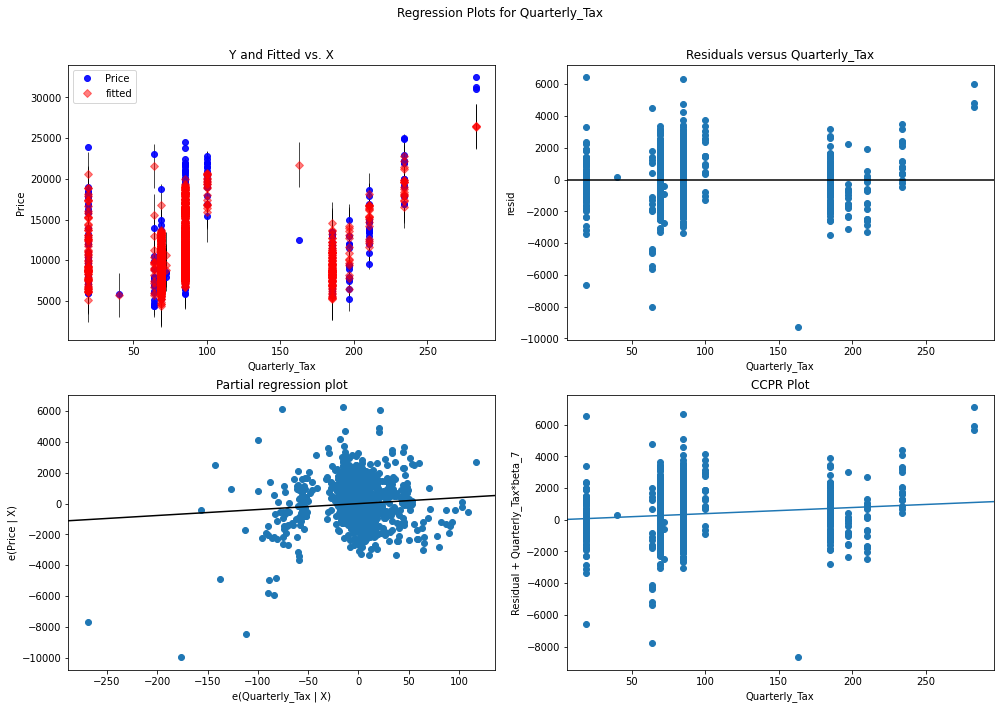

In [ ]:
fig=plt.figure(figsize=(14,10))
sm.graphics.plot_regress_exog(mult_linear_model,'Quarterly_Tax',fig=fig)
plt.show()

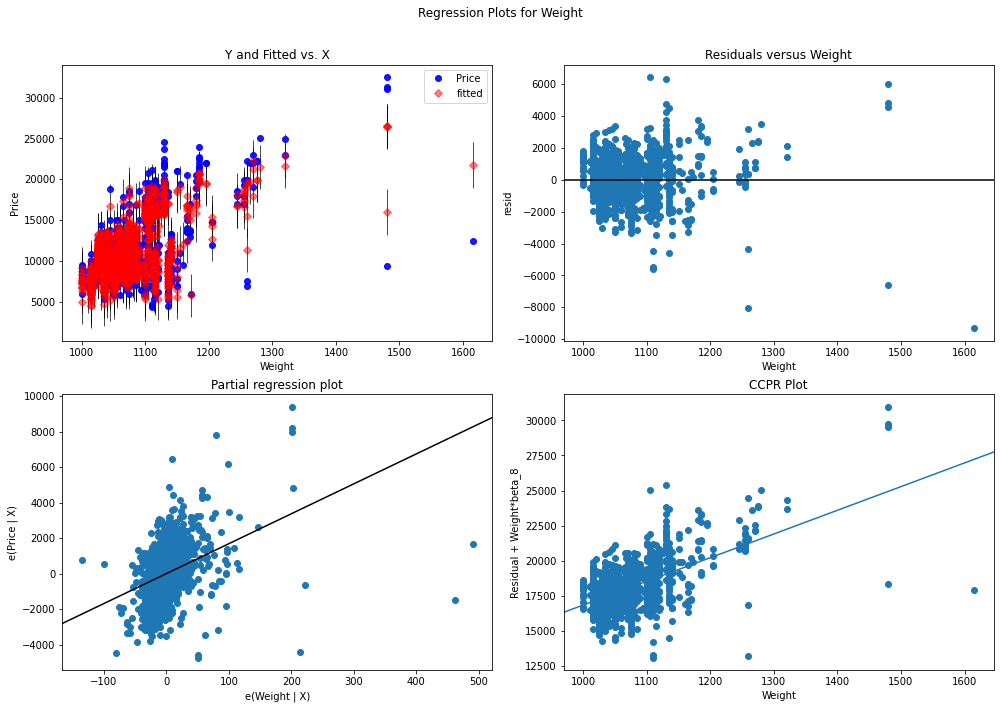

In [ ]:
fig=plt.figure(figsize=(14,10))
sm.graphics.plot_regress_exog(mult_linear_model,'Weight',fig=fig)
plt.show()

## Finding and removing Outlies to increase the model accuracy

In [ ]:
(c,_) =mult_linear_model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


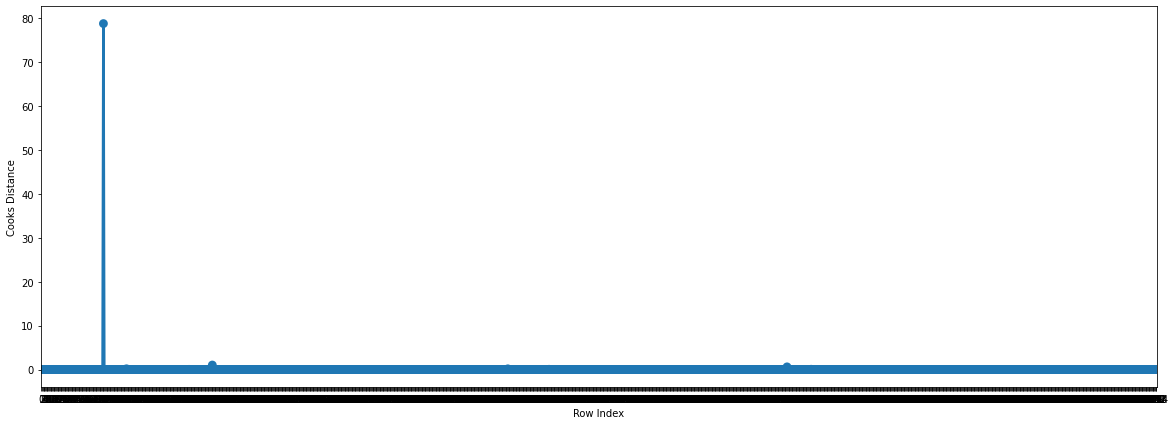

In [ ]:
fig=plt.figure(figsize=(20,7))
sns.pointplot(np.arange(len(toyota_data)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
np.argmax(c), np.max(c)

(80, 78.72950582259465)

80th row have outlier.

## influencer plot

<Figure size 1008x720 with 0 Axes>

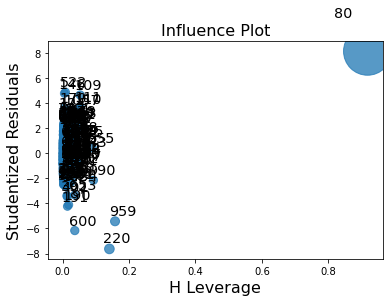

In [ ]:
fig=plt.figure(figsize=(14,10))
sm.graphics.influence_plot(mult_linear_model)
plt.show()

## Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features(columns) & n = no. of observation

In [ ]:
k=toyota_data.shape[1]
n=toyota_data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

### From the above plot, it is clear that points beyond leverage cutoff value=0.020905 are the outliers

Model Improvement

In [ ]:
toyota_data_d1=toyota_data.drop(labels=80,axis=0).reset_index(drop=True)
toyota_data_d1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
X = toyota_data_d1.drop(['Price'], axis= 1)
y = toyota_data_d1.iloc[:,:1]


In [ ]:
mult_linear_model_m1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data_d1).fit()

In [ ]:
y_pred = mult_linear_model_m1.predict(X)
y_pred = pd.DataFrame(y_pred)
y_pred 

,0
0,16513.565909
1,16051.656226
2,16486.949796
3,16133.995128
4,15921.372341
...,...
1429,8970.611964
1430,8435.944671
1431,8591.765915
1432,8714.053275


In [ ]:
mult_linear_model_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:59:45   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
Age_08_04      -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM               -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP               39.2245      2.912     13.470      0.000      33.512      44.937
cc               -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors           -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears           527.1292    192.832      2.734      0.006     148.864     905.395
Quarterly_Tax     8.9414      1.427      6.268      0.000       6.143      11.740
Weight           20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
mean_squared_error(y,y_pred)

1711281.8443644715

## In improved Model Value of AIC and BIC is reduced.Mean squared error is also reduced. Adj. R sqaured value is now 0.867 means our model is 86.7 % accurate which more than first model.

In [ ]:
mult_linear_model.rsquared_adj

0.8617487495415146

Adj. R squared Value is 86.17 % so all the feature have 86.17% contribution on predicted values

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_true=y, y_pred=y_pred)

1711281.8443644715

# Model Improvement : Trail 2

# Model Improvement with Linear Regression

## With sqrt Transformation

In [ ]:
toyota_data['sqrt_Age_08_04'] = np.sqrt(toyota_data['Age_08_04']) 
toyota_data['sqrt_KM'] = np.sqrt(toyota_data['KM'])
toyota_data['sqrt_HP'] = np.sqrt(toyota_data['HP'])
toyota_data['sqrt_cc'] = np.sqrt(toyota_data['cc'])
toyota_data['sqrt_Doors'] = np.sqrt(toyota_data['Doors'])
toyota_data['sqrt_Gears'] = np.sqrt(toyota_data['Gears'])
toyota_data['sqrt_Quarterly_Tax'] = np.sqrt(toyota_data['Quarterly_Tax'])
toyota_data['sqrt_Weight'] = np.sqrt(toyota_data['Weight'])
toyota_data_d2=toyota_data.drop (['Age_08_04','KM',	'HP',	'cc'	,'Doors',	'Gears'	,'Quarterly_Tax',	'Weight'],axis=1).drop(labels=80,axis=0).reset_index(drop=True)
toyota_data_d2

,Price,sqrt_Age_08_04,sqrt_KM,sqrt_HP,sqrt_cc,sqrt_Doors,sqrt_Gears,sqrt_Quarterly_Tax,sqrt_Weight
0,13500,4.795832,216.762543,9.486833,44.721360,1.732051,2.236068,14.491377,34.132096
1,13750,4.795832,270.068510,9.486833,44.721360,1.732051,2.236068,14.491377,34.132096
2,13950,4.898979,204.232710,9.486833,44.721360,1.732051,2.236068,14.491377,34.132096
3,14950,5.099020,219.089023,9.486833,44.721360,1.732051,2.236068,14.491377,34.132096
4,13750,5.477226,196.214169,9.486833,44.721360,1.732051,2.236068,14.491377,34.205263
...,...,...,...,...,...,...,...,...,...
1429,7500,8.306624,143.331783,9.273618,36.055513,1.732051,2.236068,8.306624,32.015621
1430,10845,8.485281,137.840488,9.273618,36.055513,1.732051,2.236068,8.306624,31.859065
1431,8500,8.426150,130.445391,9.273618,36.055513,1.732051,2.236068,8.306624,31.859065
1432,7250,8.366600,130.061524,9.273618,36.055513,1.732051,2.236068,8.306624,31.859065


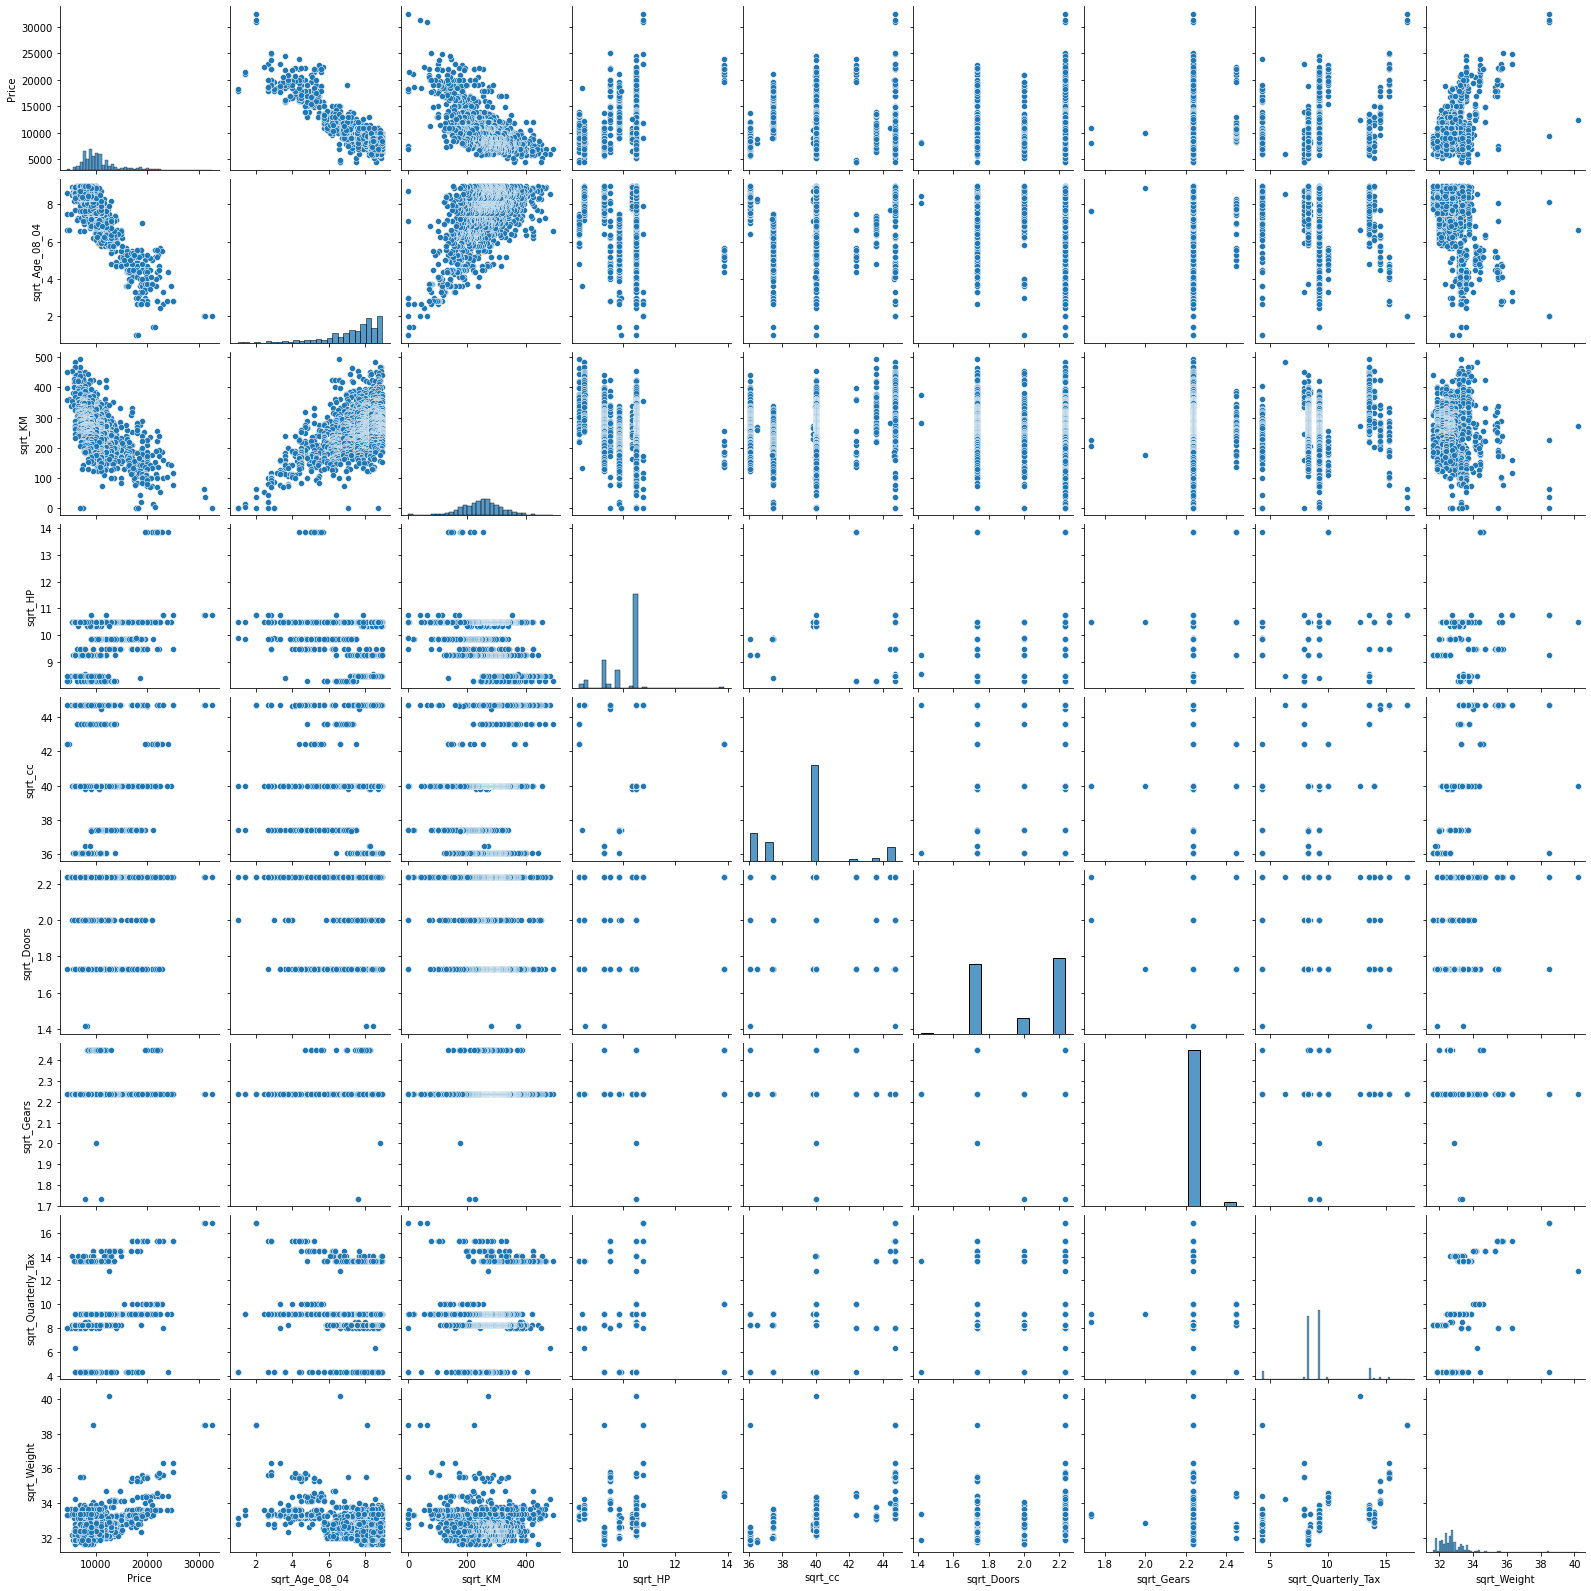

In [ ]:
sns.pairplot(toyota_data_d2)
plt.show()

In [ ]:
toyota_data_d2.corr()

,Price,sqrt_Age_08_04,sqrt_KM,sqrt_HP,sqrt_cc,sqrt_Doors,sqrt_Gears,sqrt_Quarterly_Tax,sqrt_Weight
Price,1.000000,-0.895318,-0.635270,0.303790,0.163681,0.180897,0.063111,0.194572,0.577162
sqrt_Age_08_04,-0.895318,1.000000,0.601303,-0.151403,-0.131425,-0.150671,0.000372,-0.172920,-0.496209
sqrt_KM,-0.635270,0.601303,1.000000,-0.312072,0.238531,-0.052785,0.021916,0.218148,-0.100239
sqrt_HP,0.303790,-0.151403,-0.312072,1.000000,0.053049,0.098039,0.182181,-0.292969,0.064941
sqrt_cc,0.163681,-0.131425,0.238531,0.053049,1.000000,0.131235,0.041880,0.615091,0.657017
sqrt_Doors,0.180897,-0.150671,-0.052785,0.098039,0.131235,1.000000,-0.157035,0.113250,0.306321
sqrt_Gears,0.063111,0.000372,0.021916,0.182181,0.041880,-0.157035,1.000000,0.006782,0.019635
sqrt_Quarterly_Tax,0.194572,-0.172920,0.218148,-0.292969,0.615091,0.113250,0.006782,1.000000,0.566525
sqrt_Weight,0.577162,-0.496209,-0.100239,0.064941,0.657017,0.306321,0.019635,0.566525,1.000000


In [ ]:
X = toyota_data_d2.loc[:,["sqrt_Age_08_04","sqrt_KM","sqrt_HP",'sqrt_cc','sqrt_Doors',	'sqrt_Gears',	'sqrt_Quarterly_Tax',"sqrt_Weight"]]

In [ ]:
mult_linear_model_m2 =smf.ols('Price~sqrt_Age_08_04+sqrt_KM+sqrt_HP+sqrt_cc+sqrt_Doors+sqrt_Gears+sqrt_Quarterly_Tax+sqrt_Weight',data=toyota_data_d2).fit()

In [ ]:
y_pred = mult_linear_model_m2.predict(X)
pd.DataFrame(y_pred)

,0
0,16306.091295
1,15879.400678
2,16240.336056
3,15799.386832
4,15460.548582
...,...
1429,9048.839427
1430,8619.227770
1431,8773.614239
1432,8872.551685


In [ ]:
mult_linear_model_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1302.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:00:21   Log-Likelihood:                -12260.
No. Observations:                1434   AIC:                         2.454e+04
Df Residuals:                    1425   BIC:                         2.459e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.331e+04   2692.863     -8.657      0.000   -2.86e+04    -1.8e+04
sqrt_Age_08_04     -1609.8330     34.576    -46.559      0.000   -1677.658   -1542.007
sqrt_KM               -8.0046      0.655    -12.222      0.000      -9.289      -6.720
sqrt_HP              820.3519     53.845     15.235      0.000     714.727     925.976
sqrt_cc             -182.4659     22.686     -8.043      0.000    -226.967    -137.965
sqrt_Doors          -142.7992    148.963     -0.959      0.338    -435.010     149.412
sqrt_Gears          2956.7898    829.767      3.563      0.000    1329.093    4584.486
sqrt_Quarterly_Tax   175.5282     24.555      7.148      0.000     127.360     223.697
sqrt_Weight         1187.8027     73.182     16.231      0.000    1044.248    1331.358
==============================================================================
Omnibus:                      164.379   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1200.936
Skew:                          -0.242   Prob(JB):                    1.66e-261
Kurtosis:                       7.457   Cond. No.                     2.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_true=y, y_pred=y_pred)

1561540.70190454

## Model Improvement

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


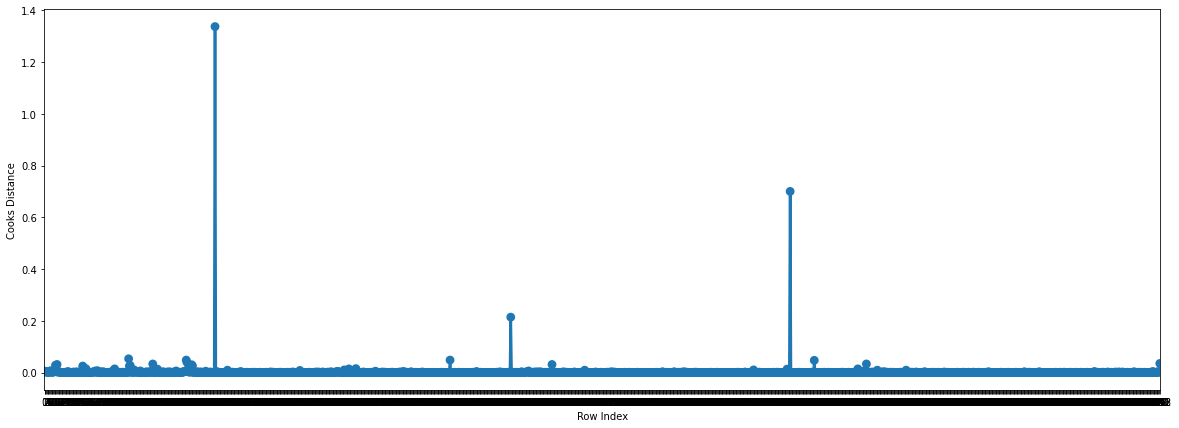

In [ ]:
(c,_) =mult_linear_model_m2.get_influence().cooks_distance
c

fig=plt.figure(figsize=(20,7))
sns.pointplot(np.arange(len(toyota_data_d2)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

### If we dropped the rows which are having cook's distance less than 0.5 then accuracy will increase Increases


In [ ]:
toyota_data_d3= toyota_data_d2.drop(toyota_data_d2.index[c>0.5],axis=0).reset_index(drop=True)
toyota_data_d3

,Price,sqrt_Age_08_04,sqrt_KM,sqrt_HP,sqrt_cc,sqrt_Doors,sqrt_Gears,sqrt_Quarterly_Tax,sqrt_Weight
0,13500,4.795832,216.762543,9.486833,44.721360,1.732051,2.236068,14.491377,34.132096
1,13750,4.795832,270.068510,9.486833,44.721360,1.732051,2.236068,14.491377,34.132096
2,13950,4.898979,204.232710,9.486833,44.721360,1.732051,2.236068,14.491377,34.132096
3,14950,5.099020,219.089023,9.486833,44.721360,1.732051,2.236068,14.491377,34.132096
4,13750,5.477226,196.214169,9.486833,44.721360,1.732051,2.236068,14.491377,34.205263
...,...,...,...,...,...,...,...,...,...
1427,7500,8.306624,143.331783,9.273618,36.055513,1.732051,2.236068,8.306624,32.015621
1428,10845,8.485281,137.840488,9.273618,36.055513,1.732051,2.236068,8.306624,31.859065
1429,8500,8.426150,130.445391,9.273618,36.055513,1.732051,2.236068,8.306624,31.859065
1430,7250,8.366600,130.061524,9.273618,36.055513,1.732051,2.236068,8.306624,31.859065


In [ ]:
X = toyota_data_d3.loc[:,["sqrt_Age_08_04","sqrt_KM","sqrt_HP",'sqrt_cc','sqrt_Doors',	'sqrt_Gears',	'sqrt_Quarterly_Tax',"sqrt_Weight"]]

In [ ]:
mult_linear_model_m3 =smf.ols('Price~sqrt_Age_08_04+sqrt_KM+sqrt_HP+sqrt_cc+sqrt_Doors+sqrt_Gears+sqrt_Quarterly_Tax+sqrt_Weight',data=toyota_data_d3).fit()

In [ ]:
y_pred = mult_linear_model_m3.predict(X)
pd.DataFrame(y_pred)

,0
0,16214.593330
1,15800.924290
2,16155.713749
3,15737.663872
4,15468.297356
...,...
1427,9164.467215
1428,8668.074695
1429,8814.958427
1430,8908.065581


In [ ]:
mult_linear_model_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1425.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:00:35   Log-Likelihood:                -12186.
No. Observations:                1432   AIC:                         2.439e+04
Df Residuals:                    1423   BIC:                         2.444e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.632e+04   2850.502    -12.741      0.000   -4.19e+04   -3.07e+04
sqrt_Age_08_04     -1513.5010     34.391    -44.008      0.000   -1580.964   -1446.038
sqrt_KM               -7.7603      0.630    -12.323      0.000      -8.996      -6.525
sqrt_HP              812.2609     51.866     15.661      0.000     710.519     914.003
sqrt_cc             -269.4880     23.194    -11.619      0.000    -314.985    -223.991
sqrt_Doors          -421.3617    145.527     -2.895      0.004    -706.832    -135.892
sqrt_Gears          2694.5548    797.598      3.378      0.001    1129.960    4259.149
sqrt_Quarterly_Tax   135.3725     24.026      5.634      0.000      88.243     182.502
sqrt_Weight         1715.7262     85.490     20.069      0.000    1548.027    1883.425
==============================================================================
Omnibus:                      121.296   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              695.064
Skew:                          -0.089   Prob(JB):                    1.17e-151
Kurtosis:                       6.408   Cond. No.                     2.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## In Last Model Value of AIC and BIC is reduced compared to previous. Adj. R sqaured value is now 0.888 means our model is 88.8 % accurate which highest from in all the models.